### Model Selection

Ridge/LASSO Linear Regression not invariant to data scaling

In [1]:
import numpy as np
# ^^^ pyforest auto-imports - don't write above this line
from scipy.linalg import lstsq

In [280]:
x = np.linspace(-5,5,100)
ran=np.random.rand(1)
y =ran/100*(x**4+x**3-x**2-x-20)+np.sin(x)# very non-linear function

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [281]:
M = x[:, np.newaxis]**[1,2,3] # approximate data via least squares of cubic polynomial


<IPython.core.display.Javascript object>

In [282]:
p, res, rnk, s = lstsq(M, y)
print("LS Solution is", p)
print("Sum of Squared Residuals is", np.round(res))
print("Rank of LS matrix is", rnk)
print("Singular Values are", s)

LS Solution is [ 0.40308245  0.13973963 -0.0221187 ]


<IPython.core.display.Javascript object>

Sum of Squared Residuals is 52.0
Rank of LS matrix is 3
Singular Values are [487.48066826 114.05444825  11.64143069]


<IPython.core.display.Javascript object>

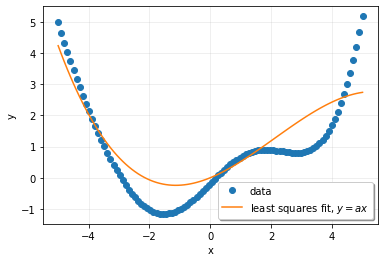

In [283]:
plt.plot(x, y, 'o', label='data')
xx = np.linspace(-5, 5, 100)
yy = p[0]*xx +p[1]*xx**2+p[2]*xx**3
plt.plot(xx, yy, label='least squares fit, $y = ax$')
plt.xlabel('x')
plt.ylabel('y')
plt.legend(framealpha=1, shadow=True)
plt.grid(alpha=0.25)
plt.show()

### Ridge Regression

Note when $\alpha$ equals 0 this simplifies to Least Squares


In [284]:
from sklearn import linear_model

ridge = linear_model.Ridge(alpha=1, fit_intercept=False)
ridgemodel=ridge.fit(M, y)
coef=ridgemodel.coef_
print(coef)

[ 0.40012997  0.13972889 -0.0219565 ]


<IPython.core.display.Javascript object>

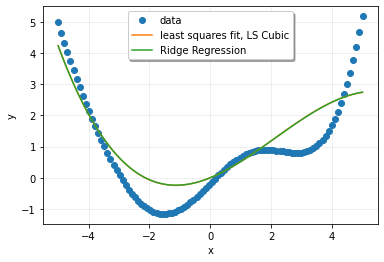

In [285]:
plt.plot(x, y, 'o', label='data')
xx = np.linspace(-5,5, 100)
yy = xx*(p[0] +p[1]*xx+p[2]*xx**2)
zz=xx*(coef[0] +coef[1]*xx+coef[2]*xx**2)
plt.plot(xx, yy, label='least squares fit, LS Cubic')
plt.plot(xx, zz, label='Ridge Regression')
plt.xlabel('x')
plt.ylabel('y')
plt.legend(framealpha=1, shadow=True)
plt.grid(alpha=0.25)
plt.show()

Can automatically include cross validation in ridge regression

In [286]:
ridgecross = linear_model.RidgeCV(alphas=np.linspace(0.01,10,20), fit_intercept=False)
ridgemodelcross=ridgecross.fit(M, y)
coefcross=ridgemodelcross.coef_
print(coefcross)
print("CV Alpha is", ridgemodelcross.alpha_)

<IPython.core.display.Javascript object>

[ 0.37538364  0.13963229 -0.02059701]
CV Alpha is 10.0


<IPython.core.display.Javascript object>

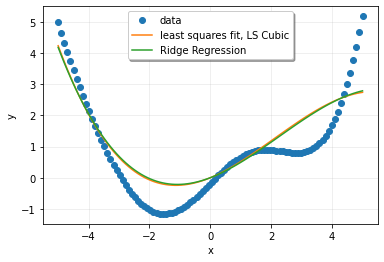

In [287]:
plt.plot(x, y, 'o', label='data')
xx = np.linspace(-5,5, 100)
yy = xx*(p[0] +p[1]*xx+p[2]*xx**2)
zz=xx*(coefcross[0] +coefcross[1]*xx+coefcross[2]*xx**2)
plt.plot(xx, yy, label='least squares fit, LS Cubic')
plt.plot(xx, zz, label='Ridge Regression')
plt.xlabel('x')
plt.ylabel('y')
plt.legend(framealpha=1, shadow=True)
plt.grid(alpha=0.25)
plt.show()

### LASSO
- Estimates Sparse Coefficients

In [288]:
lasso = linear_model.Lasso(alpha=1, fit_intercept=False)
lassomodel=lasso.fit(M, y)
coef=lassomodel.coef_
print(coef)

[0.        0.1320523 0.       ]


<IPython.core.display.Javascript object>

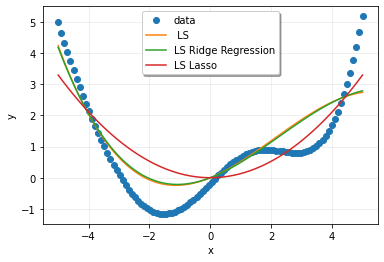

In [289]:
plt.plot(x, y, 'o', label='data')
xx = np.linspace(-5,5, 100)
yy = xx*(p[0] +p[1]*xx+p[2]*xx**2)
zz=xx*(coefcross[0] +coefcross[1]*xx+coefcross[2]*xx**2)
ll=xx*(coef[0] +coef[1]*xx+coef[2]*xx**2)
plt.plot(xx, yy, label=' LS ')
plt.plot(xx, zz, label='LS Ridge Regression')
plt.plot(xx,ll,label='LS Lasso')
plt.xlabel('x')
plt.ylabel('y')
plt.legend(framealpha=1, shadow=True)
plt.grid(alpha=0.25)
plt.show()

Interesting results above in LASSO vs Ridge Regression